# Nirav Khanpara

## Predicting the percentage of an student based on the no. of study hours

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

### Reading Data

In [12]:
data = pd.read_csv('student_scores.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


### Plotting the Data in 2D plot

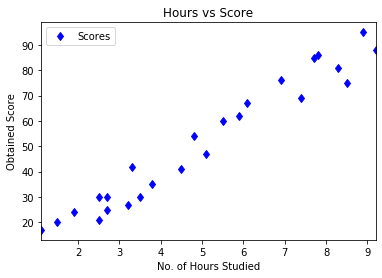

In [13]:
data.plot(x='Hours', y='Scores', style='db')  
plt.title('Hours vs Score')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Obtained Score')  
plt.show()

### Preparing data for input and output

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### Splitting data into train and test

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training LinearRegression Model

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the regression line

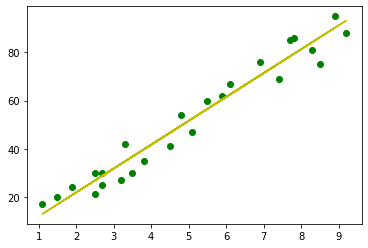

In [7]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y, c='g')
plt.plot(X, line, 'y');
plt.show()

### Predicting on Test Data

In [8]:
print(X_test)
y_pred = regressor.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Actual vs Predicted Values

In [9]:
Actual_vs_Predicted = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})
print(Actual_vs_Predicted)

   predicted  actual
0  16.884145      20
1  33.732261      27
2  75.357018      69
3  26.794801      30
4  60.491033      62


### Testing on custom data

In [10]:
hours = np.array([[9.25]])
custom_pred = regressor.predict(hours)
print("No. of Hours : 9.25\nObtained Score : ",custom_pred[0])

No. of Hours : 9.25
Obtained Score :  93.69173248737538


### Evaluating Model

In [11]:
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error : ",mean_absolute_error(y_test, y_pred))

mean_absolute_error :  4.183859899002975
